# MECANISMO CUATRO BARRAS

## ANIMACIÓN

In [1]:
import numpy as np
import math as math
import array as arr
import pprint  # para depurar
import matplotlib.pyplot as plt  #Para graficas
import matplotlib.animation as mpanim
import scipy.integrate as integrate 
import os
from time import sleep
%matplotlib inline

print ('MECANISMO DE CUATRO BARRAS')
print ('=============================')
# Lectura de datos por teclado

meca = {} # dictionary vacio, con propiedades de mecanismo

meca["L1"] = float (input ('Introduce longitud L1:'))
meca["L2"] = float (input ('Introduce longitud L2:'))
meca["L3"] = float (input ('Introduce longitud L3:'))
meca["theta"] = float (input ('Introduce angulo inicial theta:')) #En rad
meca["XB"] = float (input ('Introduce coordenada en x del punto B:'))
meca["XA"] = 0
meca["YA"] = 0
meca["YB"] = 0

# Defino posicion inicial:
q = np.array ([[0.1], [meca["L1"]], [1], [0.2], [meca["theta"]]])
print('q: ' + str(q))

a = meca["XB"] - meca ["XA"] 
b = meca["L1"]
c = meca["L2"]
d = meca["L3"]

ListaDeLongitudes = [d, c, b, a]

def ordenar(lista):
    
    for x in range (1, len(lista)):
        for y in range(len(lista)-1):
            if lista[y] < lista[y+1]:
                aux = lista[y]
                lista[y] = lista[y+1]
                lista[y+1] = aux
                
ordenar(ListaDeLongitudes)


print(ListaDeLongitudes)

a = (ListaDeLongitudes[3])
b = (ListaDeLongitudes[2])
c = (ListaDeLongitudes[1])
d = (ListaDeLongitudes[0])

if ((b+c)<(a+d)):
    print ("No cumple la desigualdad de Grashoff, por lo que la simulación no se ejecutará correctamente.")

# JACOBIANO
def jacob_Phiq(q,meca):
    #Inicializa a cero la matriz jacobiana
    Jacob = np.zeros((5,5))

    #Extraer coordenadas

    X1 = q[0]
    Y1 = q[1]
    X2 = q[2]
    Y2 = q[3]
    theta = q[4]

    #Montar matriz

    Jacob[0,0] = 2*X1
    Jacob[0,1] = 2*Y1
    Jacob[1,0] = -2*(X2-X1)
    Jacob[1,1] = -2*(Y2-Y1)
    Jacob[1,2] = 2*(X2-X1)
    Jacob[1,3] = 2*(Y2-Y1)
    Jacob[2,2] = -2*(meca["XB"]-X2)
    Jacob[2,3] = -2*(0-Y2)

    if (abs(math.cos(theta)) < (math.sqrt(2)/2) ):
        Jacob[3,4] = meca["L1"]*math.sin(theta)
        Jacob[3,0] = 1
    else:
        Jacob[3,4] = -meca["L1"]*math.cos(theta)
        Jacob[3,1] = 1


    Jacob[4,4] = 1

    return Jacob


def Phi (q,meca):
    #Inicializa a cero Phi
    Phi = np.zeros((5,1))

    #Extraer coordenadas
    X1 = q[0]
    Y1 = q[1]
    X2 = q[2]
    Y2 = q[3]
    theta = q[4]

    Phi[0] = X1**2 + Y1**2 - meca["L1"]**2
    Phi[1] = (X2-X1)**2 + (Y2-Y1)**2 -meca["L2"]**2
    Phi[2] = (meca["XB"]-X2)**2 + Y2**2 - meca["L3"]**2

    if (abs(math.cos(theta)) < (math.sqrt(2)/2) ):
        Phi[3] = X1-meca["L1"]*math.cos(theta)
    else: 
        Phi[3] = Y1-meca["L1"]*math.sin(theta)
    return Phi



def resuelve_prob_posicion(q_init, meca):
    #Inicializacion de variables
    error = 1e10
    tolerancia = 1e-10

    #Inicializacion en cero de deltaQ, fi y q
    deltaQ = np.zeros ((5,1))
    q = q_init
    i=0

    # Iteraciones hasta conseguir que el error sea menor que la tolerancia

    while (error > tolerancia and i<=100):
        #print("q=")
        #pprint.pprint(q)


        #Extraer las coordenadas
        X1 = q[0]
        Y1 = q[1]
        X2 = q[2]
        Y2 = q[3]
        theta = q[4]
       
        fi=Phi(q,meca)

        J = jacob_Phiq(q,meca)

        
        deltaQ = np.linalg.solve(J,-fi)
        q = q + deltaQ
        error = np.linalg.norm(deltaQ)  # El error es el modulo del vector
        i=i+1

        
    return q

q=resuelve_prob_posicion(q,meca)


def dibuja_mecanismo(q, meca):


    # Extraer los puntos moviles del mecanismo
    X1 = q[0]
    Y1 = q[1]
    X2 = q[2]
    Y2 = q[3]
    

    plt.axis('equal')
    
    
    plt.plot ([meca["XA"], X1], [meca["YA"], Y1])    #[pos inicial (x1,x2), pos final (y1,y2)]
    plt.plot ([X1, X2], [Y1, Y2])  
    plt.plot ([X2, meca["XB"]], [Y2, meca ["YB"]])  

    plt.plot(meca["XA"], meca["YA"], 'bo')  
    plt.plot(meca["XB"], meca["YB"], 'go') 


    plt.show(block=False) 
    return

MECANISMO DE CUATRO BARRAS
Introduce longitud L1:1
Introduce longitud L2:2
Introduce longitud L3:3
Introduce angulo inicial theta:1
Introduce coordenada en x del punto B:2
q: [[0.1]
 [1. ]
 [1. ]
 [0.2]
 [1. ]]
[3.0, 2.0, 2.0, 1.0]


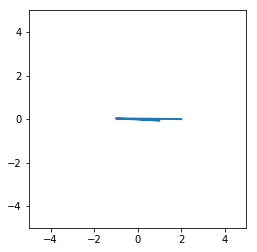

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

fig, ax = plt.subplots()

ax.set_xlim(( -5, 5))
ax.set_ylim((-5,5))
ax.set_aspect('equal')

line, = ax.plot([], [], lw=2)

last_q = q

def init():
    line.set_data([], [])
    return (line,)

def animate(i,q,meca):
    global last_q
    q = last_q
    # i: contador de iteracion: hay que mapearla a un ángulo de la manivela
    omega=2*3.14159/100  # vel. angular
    q[4] = i*omega
    
    #llamar problema de pos:    
    q = resuelve_prob_posicion(q, meca)
    last_q = q
     
    #Extraer las coordenadas
    X1 = q[0]
    Y1 = q[1]
    X2 = q[2]
    Y2 = q[3]
    theta = q[4]
       
    x=[meca["XA"], X1, X2, meca["XB"]]
    y=[meca["YA"], Y1, Y2, meca["YB"]]
    
    
    line.set_data(x, y)
    return (line,)


anim = animation.FuncAnimation(fig, animate, init_func=init, fargs=(q,meca),
                               frames=100, interval=20, 
                               blit=True)

HTML(anim.to_html5_video())


q
array([[ 1.0000000e+00],
       [ 0.0000000e+00],
       [-1.0000000e+00],
       [ 4.6473176e-08],
       [ 0.0000000e+00]])


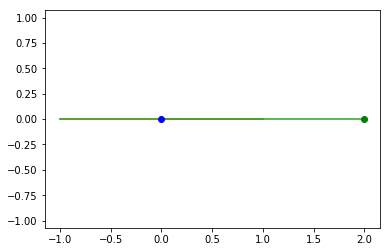

q
array([[ 0.9961947 ],
       [ 0.08715567],
       [-0.94785518],
       [ 0.55691096],
       [ 0.08726639]])


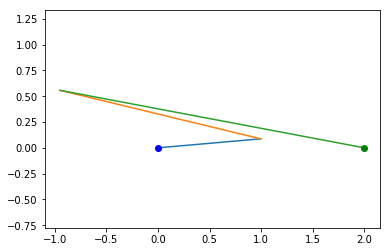

q
array([[ 0.98480778],
       [ 0.17364803],
       [-0.80145969],
       [ 1.07323045],
       [ 0.17453278]])


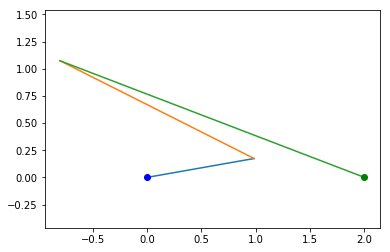

q
array([[ 0.96592588],
       [ 0.25881883],
       [-0.58674169],
       [ 1.51946288],
       [ 0.26179917]])


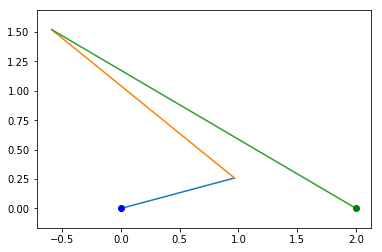

q
array([[ 0.93969272],
       [ 0.34201987],
       [-0.33591846],
       [ 1.88241466],
       [ 0.34906556]])


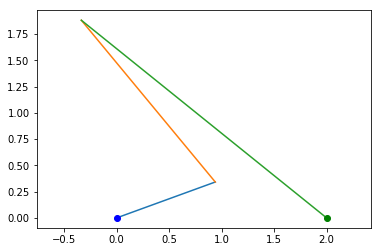

q
array([[ 0.90630794],
       [ 0.42261793],
       [-0.07835263],
       [ 2.16343485],
       [ 0.43633194]])


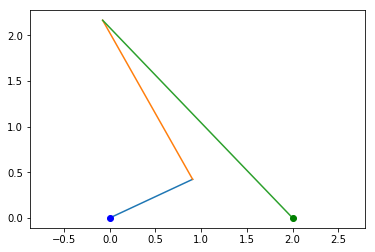

q
array([[0.86602562],
       [0.49999962],
       [0.16442019],
       [2.37289839],
       [0.52359833]])


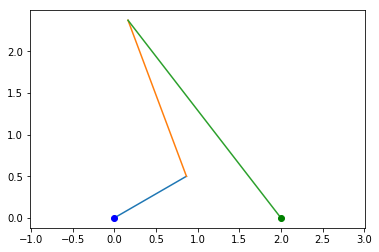

q
array([[0.81915234],
       [0.57357601],
       [0.37945185],
       [2.52464328],
       [0.61086472]])


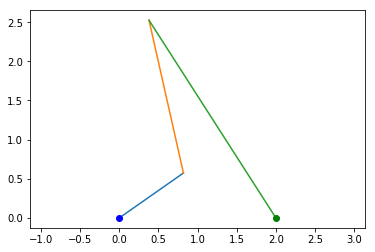

q
array([[0.76604482],
       [0.64278716],
       [0.56076595],
       [2.63222441],
       [0.69813111]])


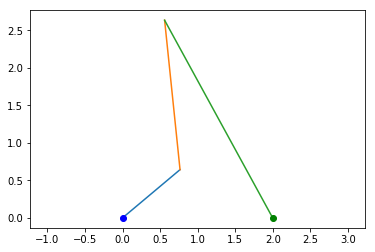

q
array([[0.70710725],
       [0.70710631],
       [0.7071058 ],
       [2.70710631],
       [0.7853975 ]])


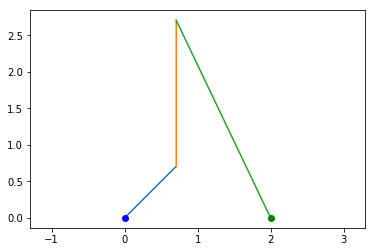

q
array([[0.64278817],
       [0.76604397],
       [0.81998003],
       [2.75817927],
       [0.87266389]])


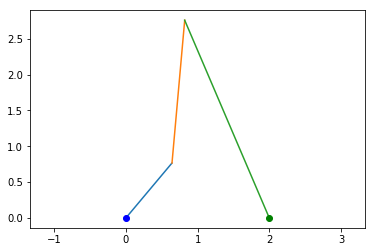

q
array([[0.5735771 ],
       [0.81915158],
       [0.9022811 ],
       [2.79195509],
       [0.95993028]])


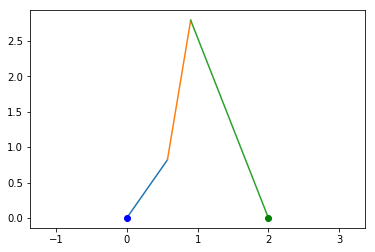

q
array([[0.50000077],
       [0.86602496],
       [0.95742667],
       [2.81301277],
       [1.04719667]])


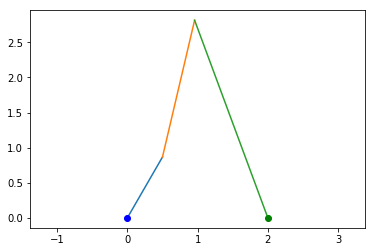

q
array([[0.42261913],
       [0.90630738],
       [0.98887881],
       [2.82447056],
       [1.13446306]])


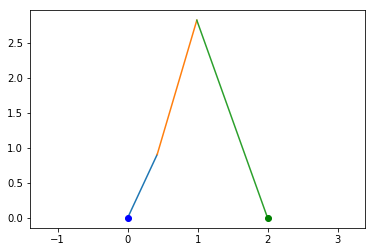

q
array([[0.34202111],
       [0.93969227],
       [0.99990361],
       [2.82839304],
       [1.22172944]])


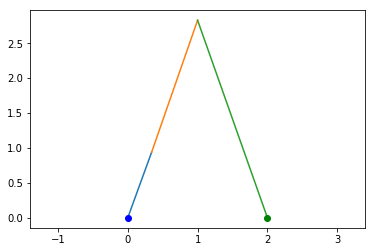

q
array([[0.25882011],
       [0.96592554],
       [0.99347128],
       [2.82611039],
       [1.30899583]])


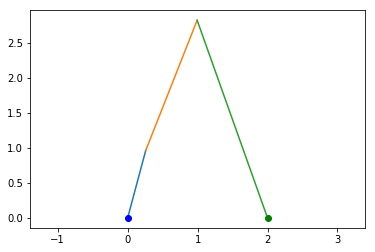

q
array([[0.17364934],
       [0.98480755],
       [0.97223197],
       [2.81845576],
       [1.39626222]])


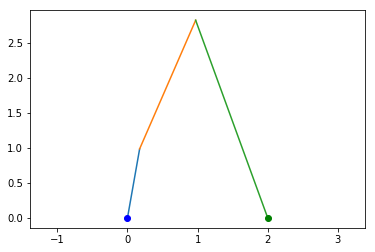

q
array([[0.08715699],
       [0.99619459],
       [0.93852904],
       [2.80593646],
       [1.48352861]])


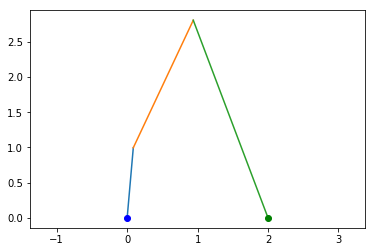

q
array([[1.32679490e-06],
       [1.00000000e+00],
       [8.94427931e-01],
       [2.78885468e+00],
       [1.57079500e+00]])


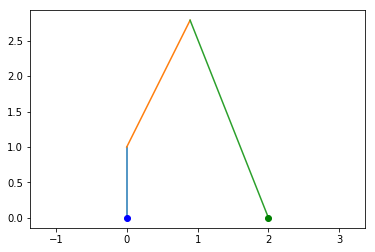

q
array([[-0.08715435],
       [ 0.99619482],
       [ 0.84174948],
       [ 2.7673915 ],
       [ 1.65806139]])


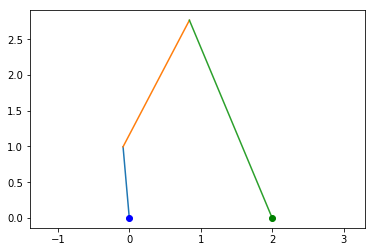

q
array([[-0.17364673],
       [ 0.98480801],
       [ 0.78210185],
       [ 2.74166448],
       [ 1.74532778]])


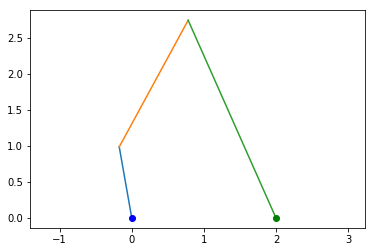

q
array([[-0.25881755],
       [ 0.96592623],
       [ 0.71690886],
       [ 2.71176642],
       [ 1.83259417]])


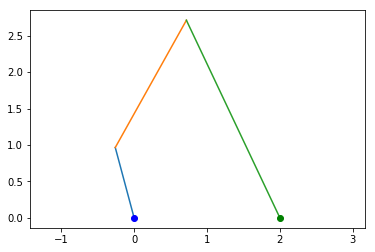

q
array([[-0.34201862],
       [ 0.93969318],
       [ 0.64743376],
       [ 2.67779098],
       [ 1.91986056]])


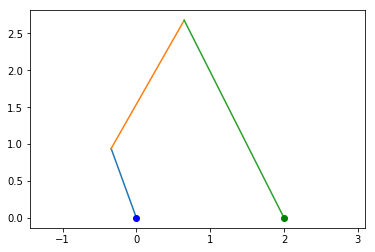

q
array([[-0.42261673],
       [ 0.9063085 ],
       [ 0.57479891],
       [ 2.63984883],
       [ 2.00712694]])


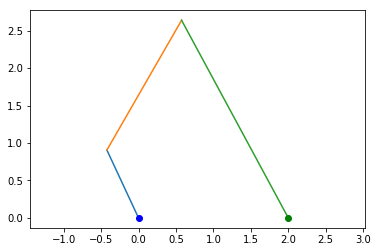

q
array([[-0.49999847],
       [ 0.86602629],
       [ 0.50000153],
       [ 2.5980771 ],
       [ 2.09439333]])


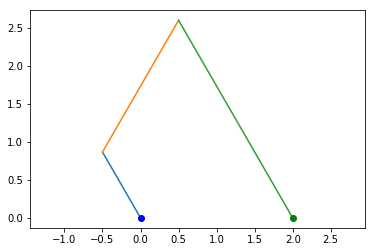

q
array([[-0.57357493],
       [ 0.8191531 ],
       [ 0.4239264 ],
       [ 2.55264412],
       [ 2.18165972]])


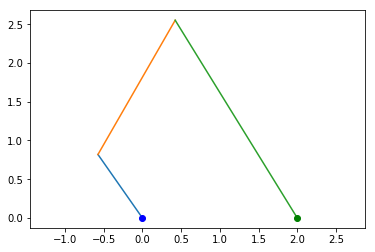

In [ ]:
i=0
while (i<2000):
      
    q[4] = i*5*3.14159/180
    q = resuelve_prob_posicion(q,meca)
    print ("q")
    pprint.pprint (q)
    dibuja_mecanismo(q,meca) 
    sleep(0.2)
    i= i+1

